In [2]:
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000 # Iteration count
train_size = x_train.shape[0]
batch_size = 100  # Minibatch size
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# Iterations per epoch
iter_per_epoch = max(train_size / batch_size, 1)

In [4]:
for i in range(iters_num):
    # Get a minibatch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # Calculate the gradient using backpropagation
    grad = network.gradient(x_batch, t_batch)
    
    # Update the parameters
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))

train acc, test acc | 0.103866666667, 0.1007
train acc, test acc | 0.904983333333, 0.9085
train acc, test acc | 0.920933333333, 0.9212
train acc, test acc | 0.93595, 0.935
train acc, test acc | 0.944233333333, 0.9411
train acc, test acc | 0.950216666667, 0.9489
train acc, test acc | 0.957366666667, 0.9535
train acc, test acc | 0.959233333333, 0.9563
train acc, test acc | 0.964466666667, 0.9596
train acc, test acc | 0.966416666667, 0.9608
train acc, test acc | 0.97015, 0.9649
train acc, test acc | 0.971666666667, 0.9658
train acc, test acc | 0.97275, 0.9658
train acc, test acc | 0.974516666667, 0.967
train acc, test acc | 0.976783333333, 0.9694
train acc, test acc | 0.976333333333, 0.9687
train acc, test acc | 0.979033333333, 0.9707


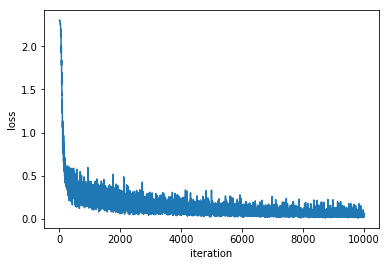

In [5]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='loss')

plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

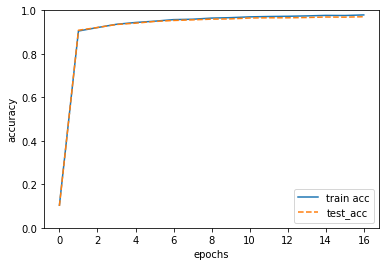

In [6]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test_acc', linestyle='--')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()